<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп», разработав такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [53]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('/datasets/insurance.csv')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [56]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


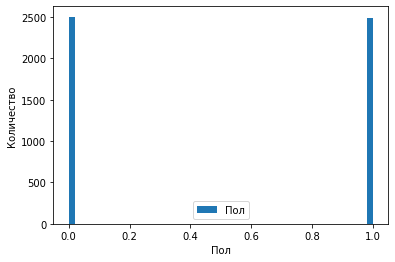

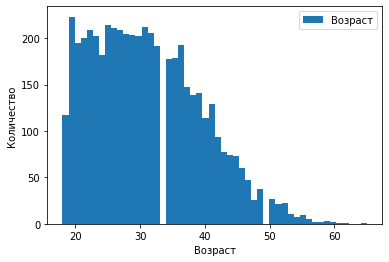

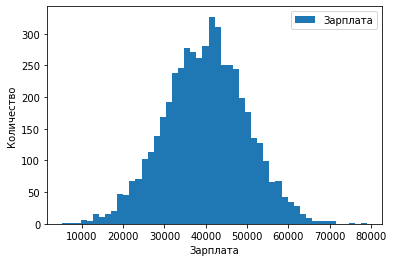

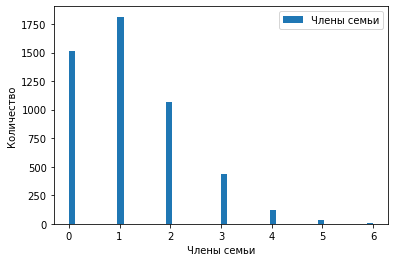

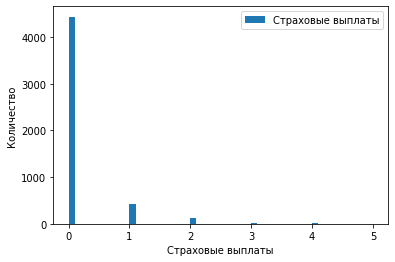

In [57]:
for col  in ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']:
    data.plot(y=col, kind='hist', bins=50)
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()

    - Пол распределен равномерно между клиентами
    - Гистограмма возраста и членов семьи представляют из себя распределение Пуассона
    - Гистограмма зарплат представлена в виде нормального распределения
    - Клиентов без страховых выплат сильно больше чем тех, кому выплаты предоставлялись. Это может влиять на качество предсказаний

## Умножение матриц

Необходимо ответить на вопрос: *Изменится ли качество линейной регрессии после шифрования данных?*

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Свойства матриц используемые в работе:**

    1) Ассоциативность умножения:
$$
A (B C) = (A B) C
$$

    2) Произведение с едичной матрицой:
$$
A E = E A = A
$$

    3) Результат умножения матриц зависит от порядка:
$$
A B ≠ B A 
$$

    4) Обратная матрица произведения матриц равна произведению обратных матриц в обратном порядке:
$$
(A B)^{-1} = B^{-1} A^{-1}
$$

**Ответ:** не изменится

**Обоснование:** 

Вектор весов модели зависит от значений целевого признака и предсказаний:
$$
w = \arg\min_w MSE(Xw, y)
$$

$$
w = \arg\min_w 1/n\sum(y-a)^2
$$

Значит, если доказать, что предсказания не поменяются при домножении признаков на обратимую матрицу, то мы докажем неизменность эффективности линейной регрессии.

Предсказания:

$$
a = Xw
$$

$$
a' = XPw'
$$

Формула обучения до умножения:

$$
w = (X^T X)^{-1} X^T y
$$

Формула обучения после умножения:

$$
w' = ((X P)^T X P)^{-1} (X P)^T y
$$

Докажем тождественное равенство предсказаний до умножения и после:

$$
a = a'
$$

$$
X w = X P w'
$$

$$
X (X^T X)^{-1} X^T y = X P ((X P)^T X P)^{-1} (X P)^T y
$$

$$
X (X^T X)^{-1} X^T y = X P P^{-1} ((X P)^T X)^{-1} P^T X^T y
$$

$$
X (X^T X)^{-1} X^T y = X E (P^T X^T X)^{-1} P^T X^T y
$$

$$
X (X^T X)^{-1} X^T y = X (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
X (X^T X)^{-1} X^T y = X (X^T X)^{-1} E X^T y
$$

$$
X (X^T X)^{-1} X^T y = X (X^T X)^{-1} X^T y
$$

$$
y = y
$$

Так как после приравнивания предсказанний тождественное равенство подтвердилось, это означает, что предсказания до домножения матрицы признаков и после равны. Качество линейной регрессии не изменится.

## Алгоритм преобразования

**Алгоритм**

    1) Создать матрицу с признаками размерности m*n
    2) Создать обратимую матрицу размерности n*n
    3) Скалярно умножить матрицу с признаками на обратимую матрицу из 2 пункта. Получится матрица с зашифрованными признаками размерности m*n
    4) Определить качество линейной регрессии и сравнить результаты с качетвом на неизмененной матрице с признаками

**Обоснование**

*Обоснование приведено во 2 пункте.*

## Проверка алгоритма

Выделяем признаки и целевой признак в отдельные переменные.

In [58]:
target = data['Страховые выплаты']
features = data.drop(['Страховые выплаты'], axis=1)

Создаем переменные с матрицой значений признаков размерности 5000х4 и вектор с целевым признаком.

In [59]:
target_v = target.values
features_v = features.values

Создаем обратимую матрицу размерности 4х4.

In [60]:
def matrix_create(n):
    p = np.random.normal(size=(n, n))
    try:
        np.linalg.inv(p)
    except:
        p = matrix_create(n)
    return p

p = matrix_create(features_v.shape[1])
p

array([[ 1.3621994 ,  1.99095617, -0.50198326,  0.65658458],
       [ 0.5607175 , -0.3753817 , -0.72732833,  0.19655778],
       [-1.00823219, -0.82510996, -1.02319195,  0.65935178],
       [ 0.10172857,  1.75700444, -0.99690536, -1.84564254]])

Обучим линейную регрессию на **неизмененных** данных и подсчитаем значение метрики R2.

In [61]:
model = LinearRegression()
model.fit(features_v, target_v)
predictions = model.predict(features_v)
print('R2 на изначальных данных: {:.2f}'.format(r2_score(target_v, predictions)))

R2 на изначальных данных: 0.42


Обучим линейную регрессию на **измененных** данных и подсчитаем значение метрики R2.

In [62]:
features_v = features_v.dot(p)
model = LinearRegression()
model.fit(features_v, target_v)
predictions_upd = model.predict(features_v)
print('R2 на изначальных данных: {:.2f}'.format(r2_score(target_v, predictions_upd)))

R2 на изначальных данных: 0.42


Значения R2 совпадают. Это означает, что данные успешно зашифрованы без изменения качетсва работы регрессии.

## Вывод

В ходе работы был представлен пример шифрования данных, чтобы по ним было сложно восстановить данные клиентов. Была доказана корректность представленного метода как аналитически с помощью формул, так и практически.